In [26]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [27]:
df = pd.read_json("results.jsonl", lines=True)
print(len(df))
df.head()

150


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,42ddac72f620761f0f2607f523e478f6ff4e8473,winey-jird,bdsaglam/musique,answerable,validation,llama-3-70b-tgi,0.1,cte/excellent-format-triplets-few.txt,cq.txt,auto/cte.json,...,168.0,2389,14.811218,80.000068,0,2.0,4,8,1912,cte
1,1da2722c10bd5dd1d46c6bef730ab3ccbe8eda58,tight-vies,bdsaglam/musique,answerable,validation,llama-3-70b-tgi,0.5,cte/excellent-format-triplets-few.txt,cq.txt,auto/cte.json,...,85.0,2144,7.441231,51.113073,0,0.0,0,0,1231,cte
2,5550edf8fcbed6feaa3c8b4354f3d842b720bedf,paper-pats,bdsaglam/musique,answerable,validation,llama-3-70b-tgi,0.1,cte/format-triplets-few.txt,cq.txt,auto/cte.json,...,354.0,2073,36.415822,141.709035,0,0.0,2,36,3187,cte
3,e71ce572514e4cced9e6d9acf7188c8bf6f935c6,outer-slug,bdsaglam/musique,answerable,validation,llama-3-70b-tgi,0.5,cte/format-triplets-few.txt,cq.txt,auto/cte.json,...,401.0,1730,52.976301,140.608082,0,3.0,28,58,3439,cte
4,f14a1d9025008ece6ab792256b88139463dbc6de,regal-jill,bdsaglam/musique,answerable,validation,llama-3-70b-tgi,0.5,cot/format-thought.txt,cq.txt,auto/cot.json,...,278.0,1891,32.442623,82.831705,0,4.0,8,40,1823,cot


In [28]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop(
    columns=[
        "id",
        "name",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
        "params.qa.model",
    ],
    inplace=True,
)

In [29]:
target_param_cols = [
    "params.qa.technique",
    "params.qa.system_prompt",
    "params.qa.user_prompt_template",
    "params.qa.few_shot_examples",
    "params.qa.n_shot",
    "params.qa.temperature",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,0.1,ccot/format-thought.txt,cq.txt,auto/ccot.json,0,1,0.579230,0.692420,0.625399,0.736187,...,990.0,747,61.585007,107.491650,0,37.0,47,59,1634,ccot
1,0.1,ccot/format-thought.txt,cq.txt,auto/ccot.json,0,2,0.000000,0.000000,0.000000,0.000000,...,NaN,2417,4.613984,69.160059,0,0.0,0,0,2180,ccot
2,0.1,ccot/format-thought.txt,cq.txt,auto/ccot.json,0,3,0.010757,0.013573,0.019968,0.025405,...,51.0,2383,5.311372,32.396635,0,0.0,1,3,732,ccot
3,0.5,ccot/format-thought.txt,cq.txt,auto/ccot.json,0,1,0.544890,0.653394,0.623003,0.733941,...,1050.0,841,64.994055,173.758641,0,31.0,44,57,3926,ccot
4,0.5,ccot/format-thought.txt,cq.txt,auto/ccot.json,0,2,0.168804,0.199442,0.201278,0.235322,...,132.0,1949,18.459723,83.088632,0,0.0,2,18,2208,ccot


In [30]:
run_counts = df.groupby(target_param_cols)["params.run"].aggregate(tuple).reset_index()
mask = run_counts["params.run"].map(len) != 3
run_counts.loc[mask]

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,params.run


In [31]:
def remove_ext(filename):
    return filename.split(".", 1)[0]

df["params.qa.system_prompt"] = df["params.qa.system_prompt"].map(remove_ext)
df["params.qa.user_prompt_template"] = df["params.qa.user_prompt_template"].map(remove_ext)
df["params.qa.few_shot_examples"] = df["params.qa.few_shot_examples"].map(remove_ext)

In [32]:
df['params.qa.system_prompt'].unique()

array(['ccot/format-thought', 'cot/format-thought',
       'cte/excellent-format-triplets-few', 'cte/format-triplets-few',
       'direct/format-few'], dtype=object)

In [33]:
avg_df = df.groupby(target_param_cols)[metric_cols].mean().reset_index()
avg_df.head()

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
0,ccot,ccot/format-thought,cq,auto/ccot,0,0.1,0.196663,0.235331,0.215122,0.253864,...,45.875000,520.500000,1849.000000,23.836788,69.682781,0.0,12.333333,16.000000,20.666667,1515.333333
1,ccot,ccot/format-thought,cq,auto/ccot,0,0.5,0.305475,0.370460,0.352503,0.418251,...,51.333333,428.333333,1532.666667,37.331200,110.109454,0.0,11.333333,20.333333,36.000000,2488.333333
2,ccot,ccot/format-thought,cq,auto/ccot,1,0.1,0.000000,0.000089,0.000000,0.000171,...,NaN,NaN,2417.000000,1.666253,13.522271,0.0,0.000000,0.000000,0.666667,415.333333
3,ccot,ccot/format-thought,cq,auto/ccot,1,0.5,0.034478,0.046549,0.034878,0.044725,...,44.333333,94.333333,2311.333333,5.267712,39.040545,0.0,0.000000,0.000000,1.000000,1099.666667
4,ccot,ccot/format-thought,cq,auto/ccot,3,0.1,0.110743,0.129020,0.206603,0.241337,...,39.000000,114.000000,2106.333333,6.252935,36.389601,0.0,0.333333,0.666667,5.000000,1258.000000


In [34]:
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby('params.qa.technique')["metrics.f1"].idxmax()
best_df = avg_df.loc[max_f1_rows, target_param_cols + metric_cols].sort_values('metrics.f1', ascending=False)
best_df

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
40,direct,direct/format-few,cq,auto/direct,0,0.1,0.529720,0.649839,0.563898,0.682528,...,7.000000,21.333333,854.666667,7.761365,32.360587,0.0,4.000000,5.000000,7.000000,748.666667
20,cte,cte/excellent-format-triplets-few,cq,auto/cte,0,0.1,0.498000,0.596968,0.519702,0.622550,...,71.666667,392.333333,972.666667,86.698529,151.955046,0.0,36.166667,56.666667,84.000000,2412.333333
1,ccot,ccot/format-thought,cq,auto/ccot,0,0.5,0.305475,0.370460,0.352503,0.418251,...,51.333333,428.333333,1532.666667,37.331200,110.109454,0.0,11.333333,20.333333,36.000000,2488.333333
19,cot,cot/format-thought,cq,auto/cot,9,0.5,0.206316,0.252317,0.215389,0.261792,...,62.666667,131.666667,1817.333333,20.685023,30.150671,0.0,0.000000,2.333333,40.333333,249.666667


## Visualizations

In [35]:
def prepare_data(dataf):
    # Simplify column names for use in formula
    dataf = dataf[target_param_cols + ['params.run'] + metric_cols[:2]].rename(
        columns={
            col: col.replace("params.qa.", "").replace("params.", "").replace("metrics.", "")
            for col in dataf.columns
        }
    )

    # Combine prompts into a single column for simplicity
    dataf["prompt"] = (
        dataf["system_prompt"]
        + " | "
        + dataf["user_prompt_template"]
        + " | "
        + dataf["n_shot"].map(str)
    )

    return dataf


In [36]:
def plot_variance(dataf, x='temperature', y='f1', hue='prompt', technique=None, figsize=(12, 8), legend='auto', legend_loc='lower left'):  
    if technique:
        dataf = dataf[dataf['technique'] == technique]
    plt.figure(figsize=figsize)
    sns.lineplot(x=x, y=y, hue=hue, data=dataf, linewidth=2.5, legend=legend)
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    if legend:
        plt.legend(loc=legend_loc)
    plt.tight_layout()
    plt.show()

In [37]:
prepared_df = prepare_data(df)
zero_shot_mask = prepared_df["n_shot"] == 0
prepared_df

,technique,system_prompt,user_prompt_template,few_shot_examples,n_shot,temperature,run,exact_match,f1,prompt
0,ccot,ccot/format-thought,cq,auto/ccot,0,0.1,1,0.579230,0.692420,ccot/format-thought | cq | 0
1,ccot,ccot/format-thought,cq,auto/ccot,0,0.1,2,0.000000,0.000000,ccot/format-thought | cq | 0
2,ccot,ccot/format-thought,cq,auto/ccot,0,0.1,3,0.010757,0.013573,ccot/format-thought | cq | 0
3,ccot,ccot/format-thought,cq,auto/ccot,0,0.5,1,0.544890,0.653394,ccot/format-thought | cq | 0
4,ccot,ccot/format-thought,cq,auto/ccot,0,0.5,2,0.168804,0.199442,ccot/format-thought | cq | 0
...,...,...,...,...,...,...,...,...,...,...
145,direct,direct/format-few,cq,auto/direct,9,0.1,2,0.121225,0.155668,direct/format-few | cq | 9
146,direct,direct/format-few,cq,auto/direct,9,0.1,3,0.102193,0.142802,direct/format-few | cq | 9
147,direct,direct/format-few,cq,auto/direct,9,0.5,1,0.611088,0.733374,direct/format-few | cq | 9
148,direct,direct/format-few,cq,auto/direct,9,0.5,2,0.067439,0.111374,direct/format-few | cq | 9


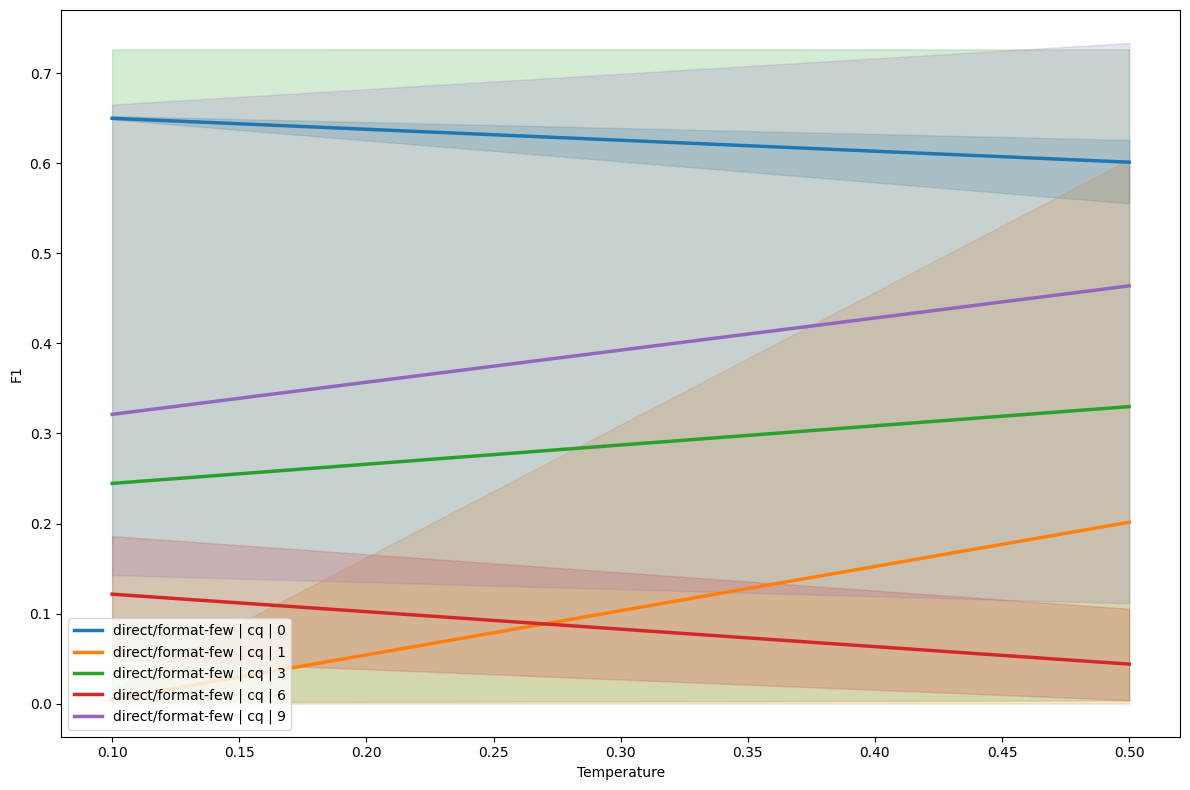

In [38]:
plot_variance(prepared_df, technique='direct', legend='brief')

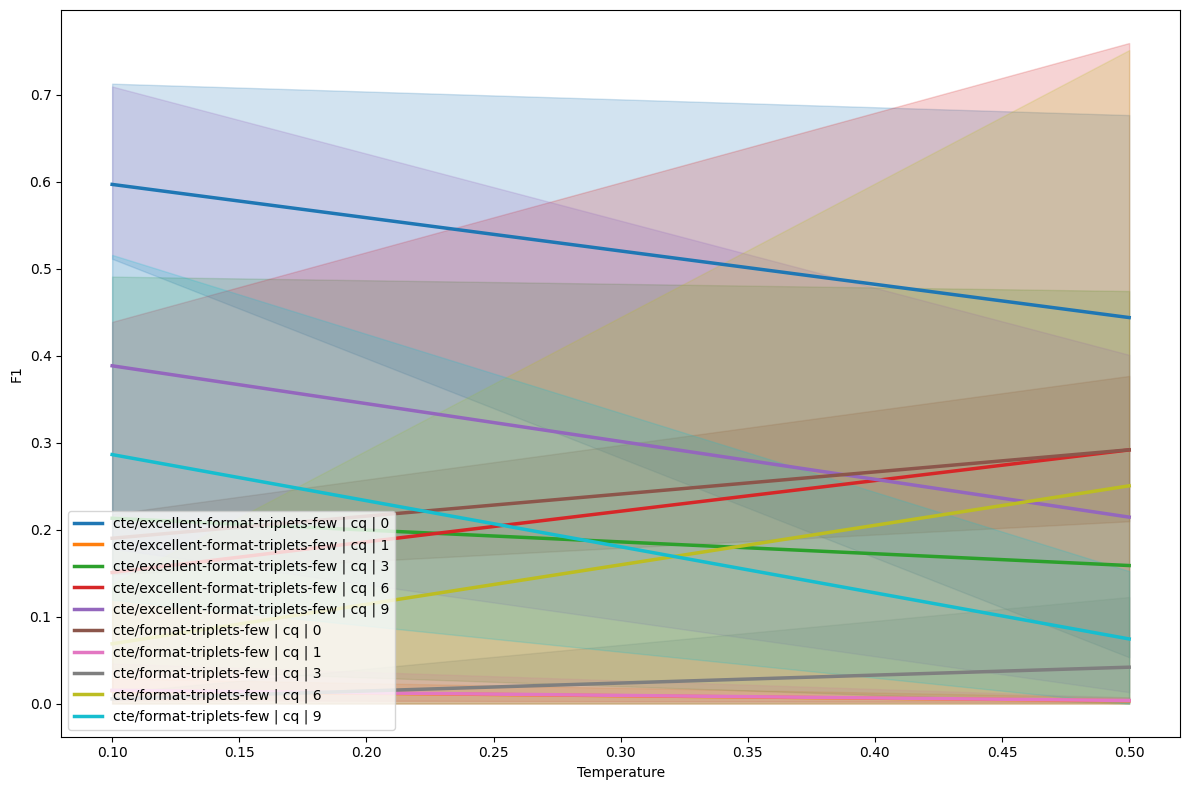

In [39]:
plot_variance(prepared_df, technique='cte', legend='brief')

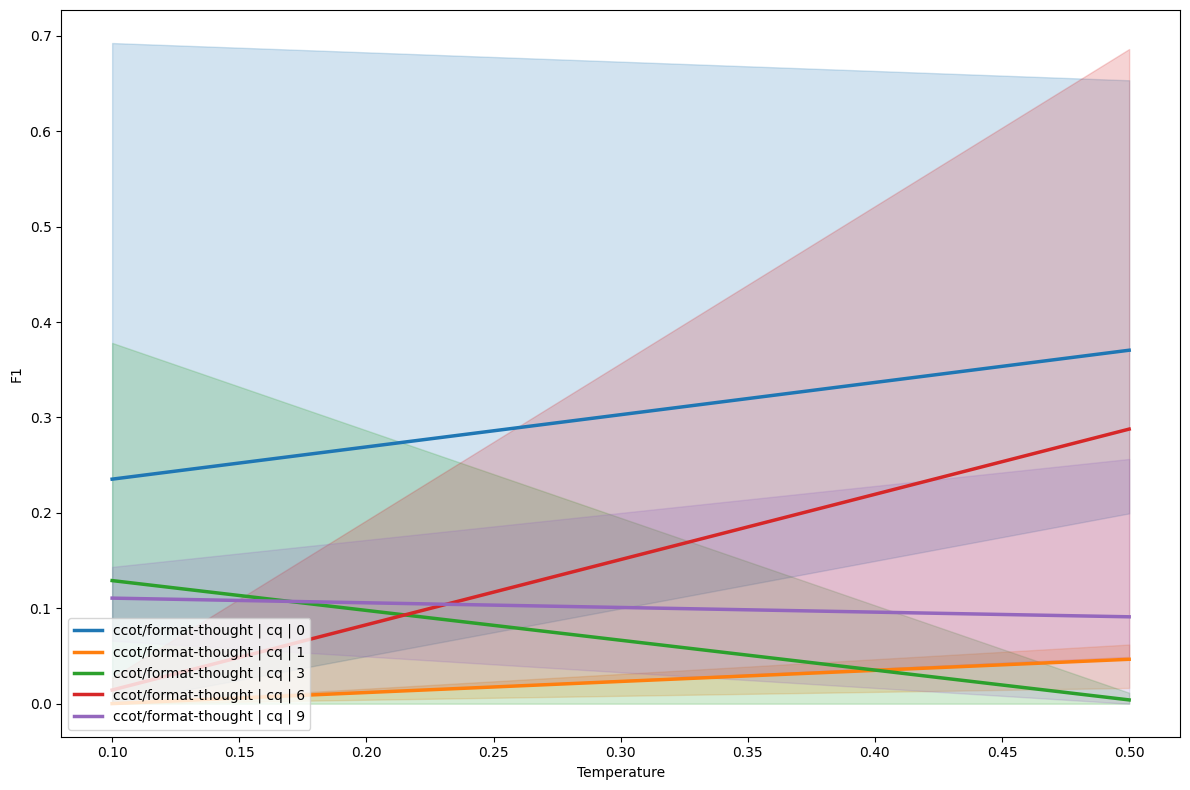

In [40]:
plot_variance(prepared_df, technique='ccot', legend='brief')

In [41]:
best_df['params.run'] = 0
best_prompts = prepare_data(best_df).prompt.values.tolist()
_data = prepared_df.copy()
prompt_mask = _data['prompt'].isin(best_prompts)
best_prepared_df = _data.loc[prompt_mask]
best_prepared_df

,technique,system_prompt,user_prompt_template,few_shot_examples,n_shot,temperature,run,exact_match,f1,prompt
0,ccot,ccot/format-thought,cq,auto/ccot,0,0.1,1,0.579230,0.692420,ccot/format-thought | cq | 0
1,ccot,ccot/format-thought,cq,auto/ccot,0,0.1,2,0.000000,0.000000,ccot/format-thought | cq | 0
2,ccot,ccot/format-thought,cq,auto/ccot,0,0.1,3,0.010757,0.013573,ccot/format-thought | cq | 0
3,ccot,ccot/format-thought,cq,auto/ccot,0,0.5,1,0.544890,0.653394,ccot/format-thought | cq | 0
4,ccot,ccot/format-thought,cq,auto/ccot,0,0.5,2,0.168804,0.199442,ccot/format-thought | cq | 0
5,ccot,ccot/format-thought,cq,auto/ccot,0,0.5,3,0.202731,0.258543,ccot/format-thought | cq | 0
54,cot,cot/format-thought,cq,auto/cot,9,0.1,1,0.216384,0.281571,cot/format-thought | cq | 9
55,cot,cot/format-thought,cq,auto/cot,9,0.1,2,0.151427,0.182876,cot/format-thought | cq | 9
56,cot,cot/format-thought,cq,auto/cot,9,0.1,3,0.144808,0.190005,cot/format-thought | cq | 9
57,cot,cot/format-thought,cq,auto/cot,9,0.5,1,0.421183,0.497030,cot/format-thought | cq | 9


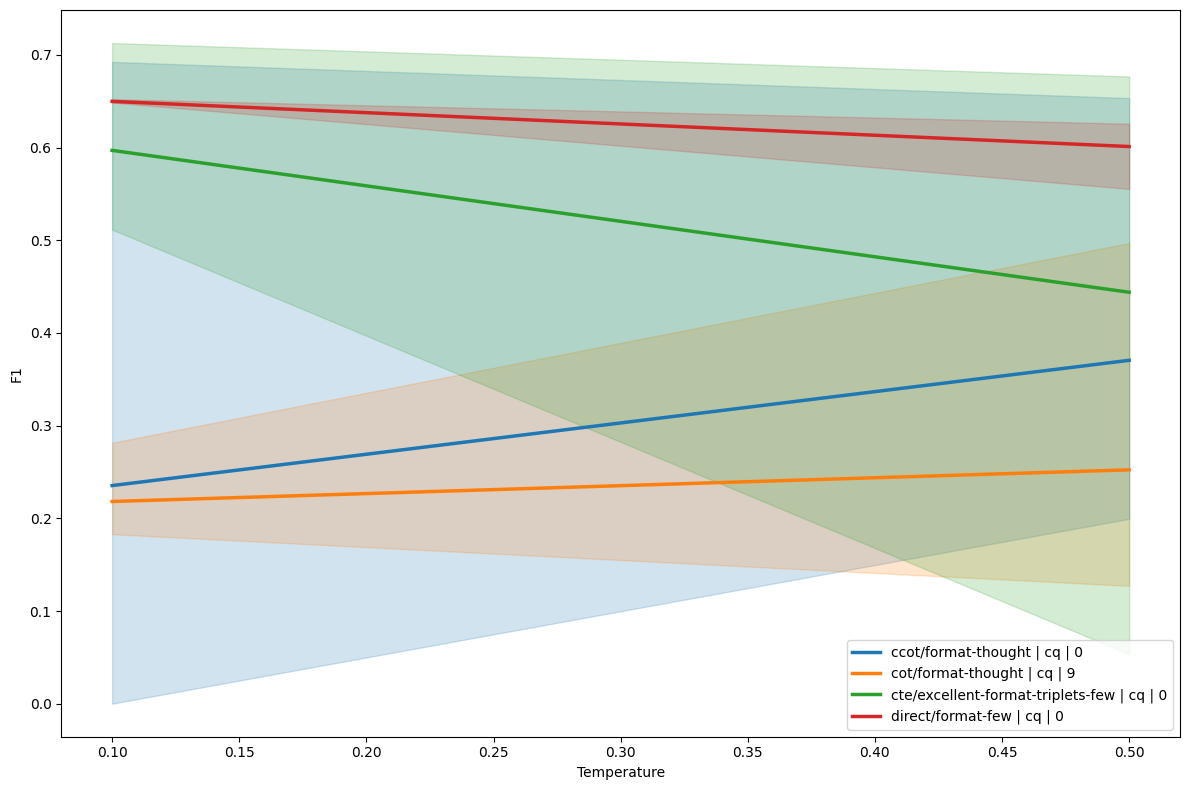

In [42]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower right')

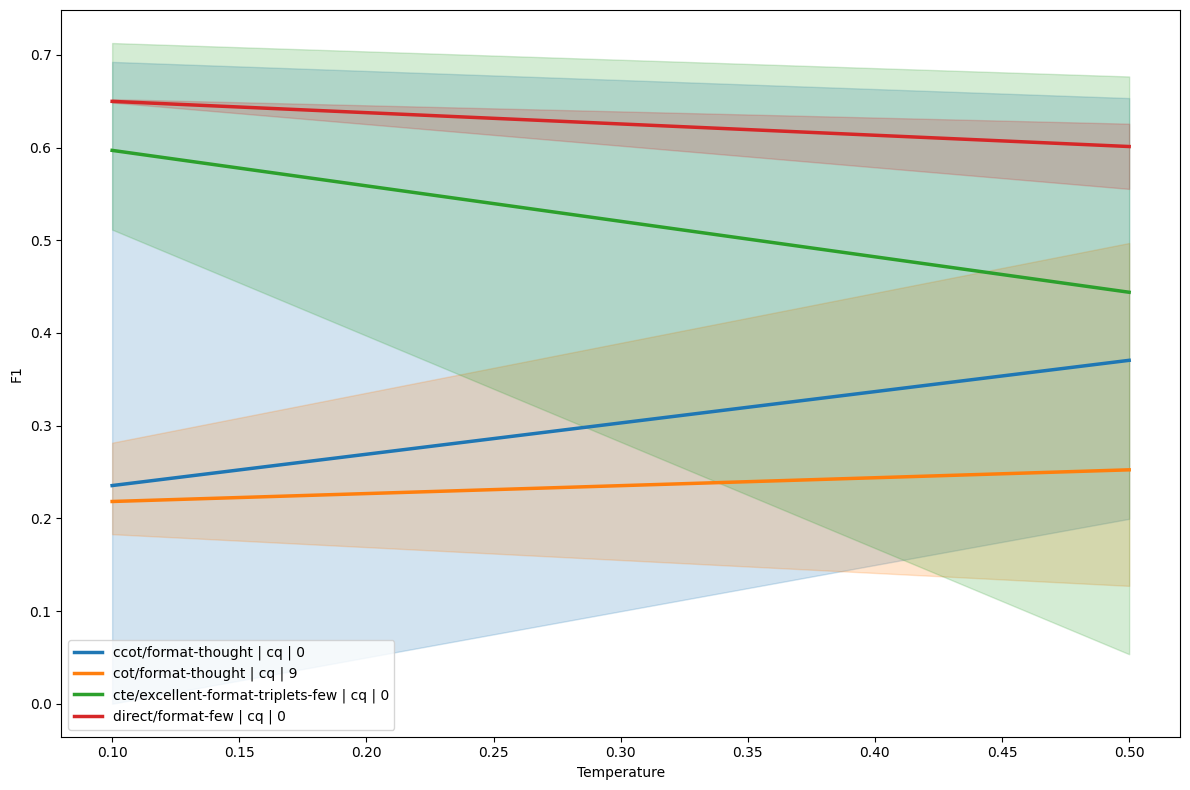

In [43]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower left')

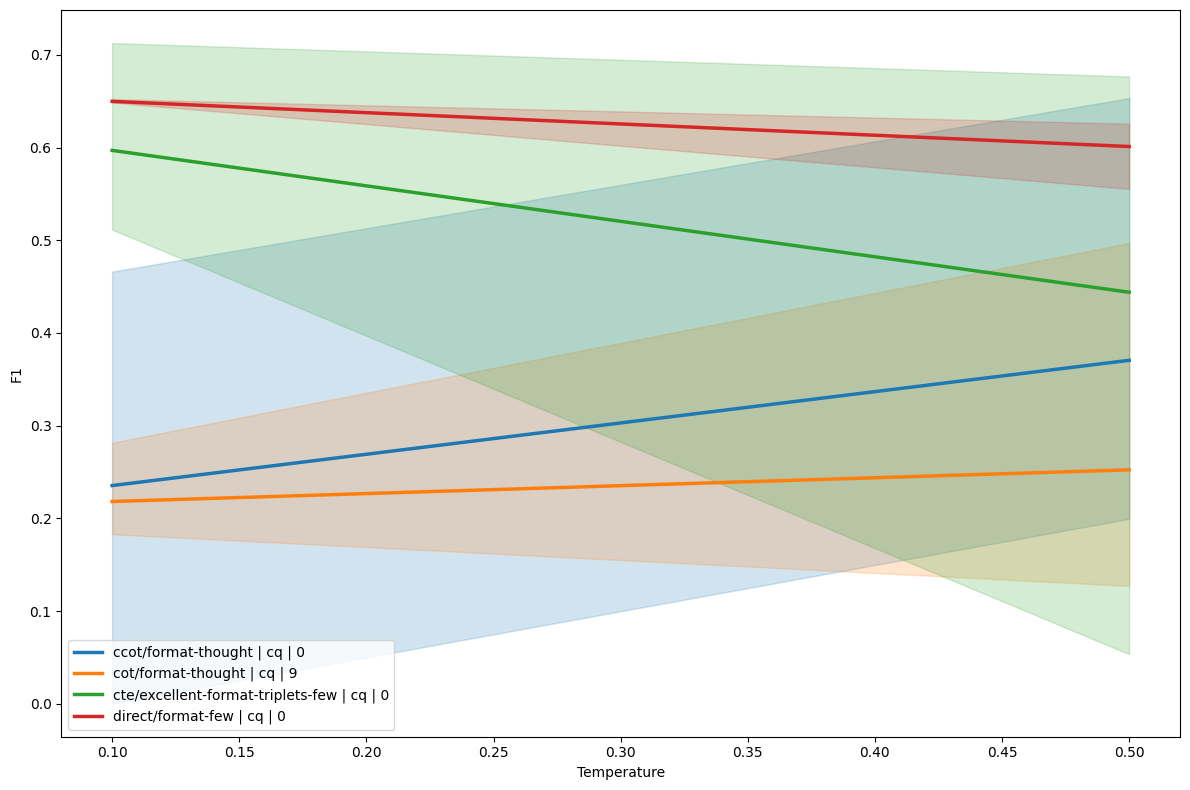

In [44]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], figsize=(12, 8), legend_loc='lower left')

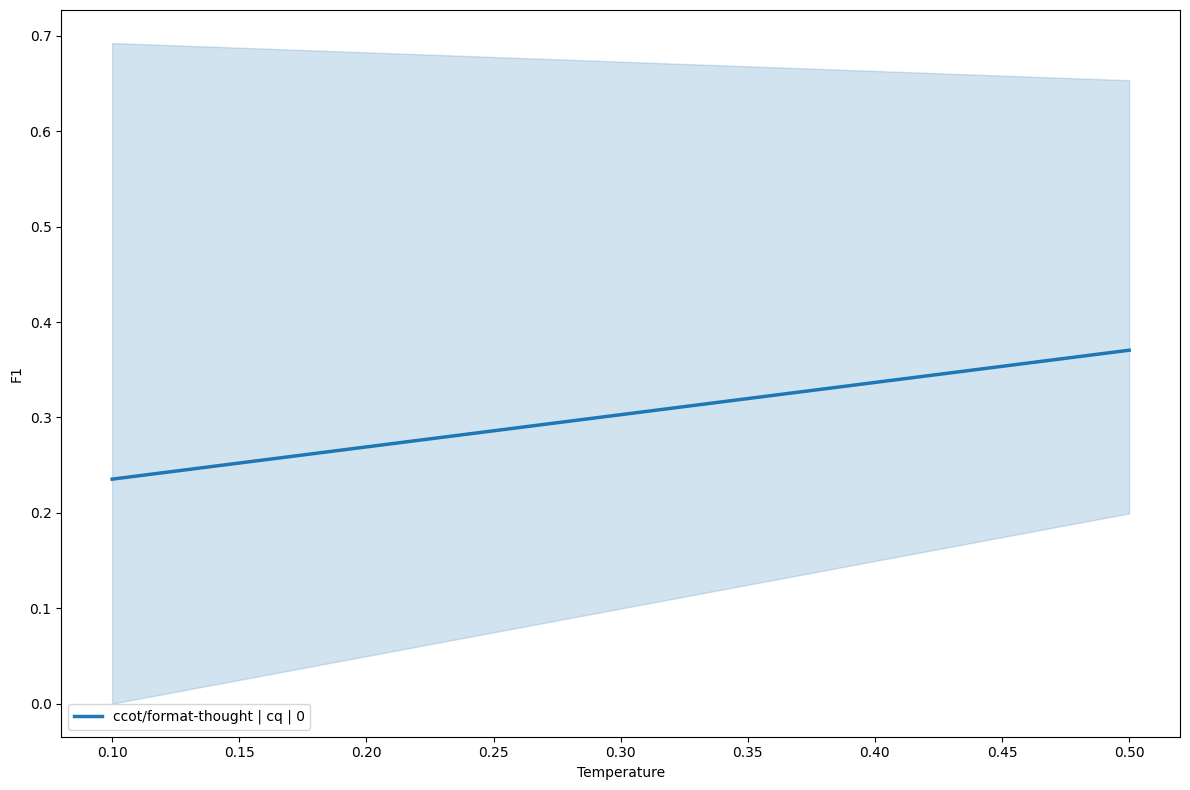

In [45]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='ccot', figsize=(12, 8), legend_loc='lower left')

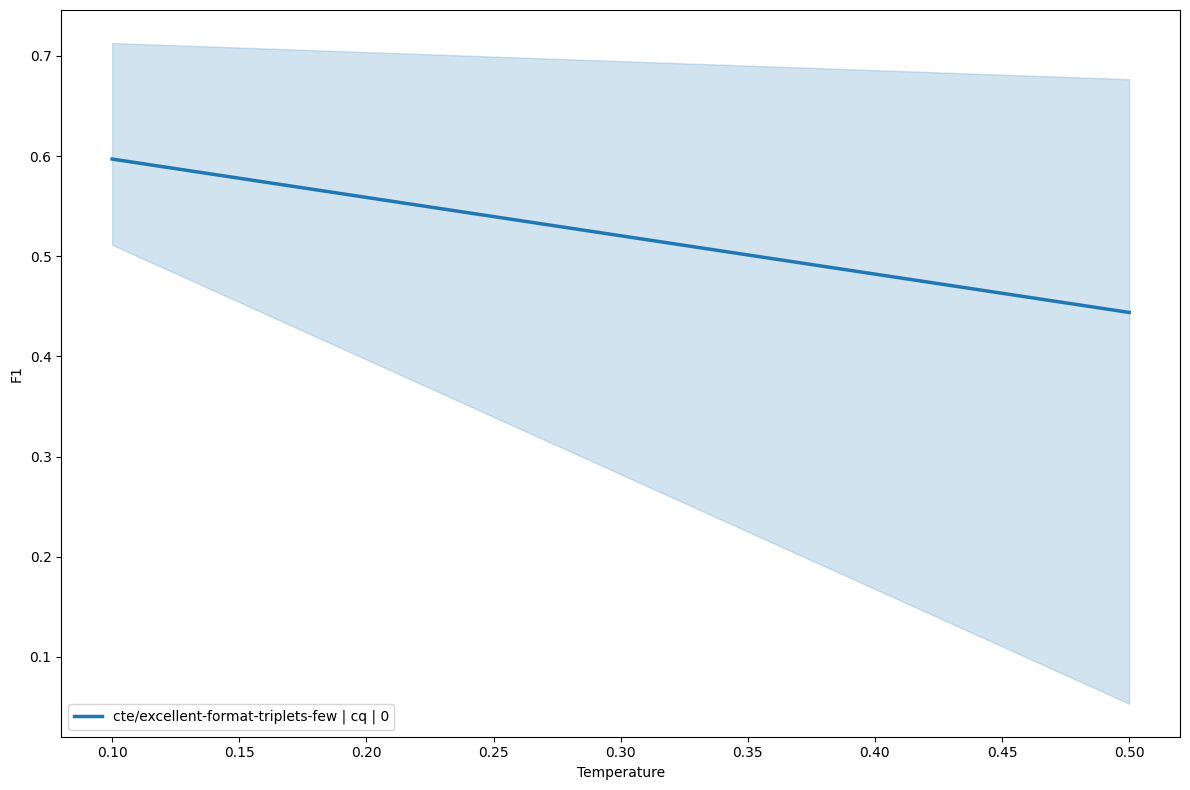

In [46]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='cte', figsize=(12, 8), legend_loc='lower left')

## Inspect

In [47]:
# # box-whisker plot
# plt.figure(figsize=(12, 8))
# sns.boxplot(
#     x="prompt",
#     y="f1",
#     data=prepared_df.sort_values(by="f1"),
# )
# plt.xticks(rotation=60, ha="right");

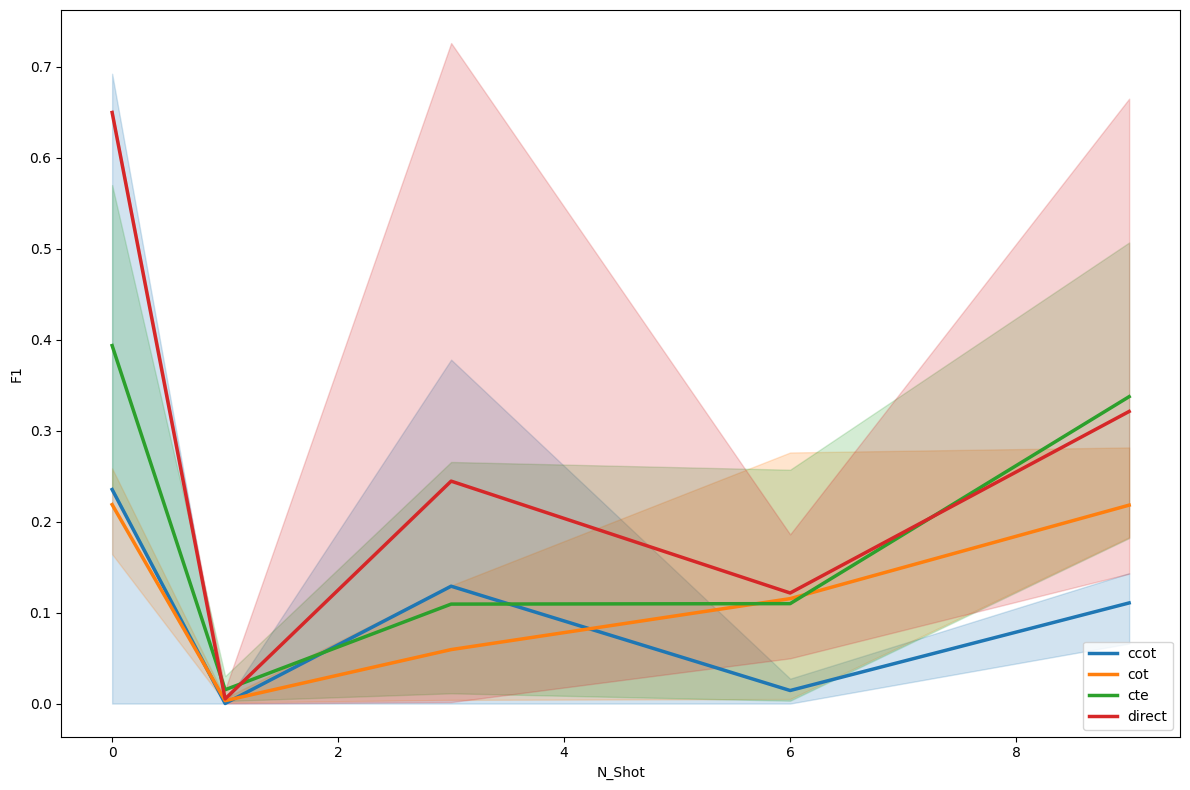

In [48]:
plot_variance(prepared_df[prepared_df['temperature'] == 0.1], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

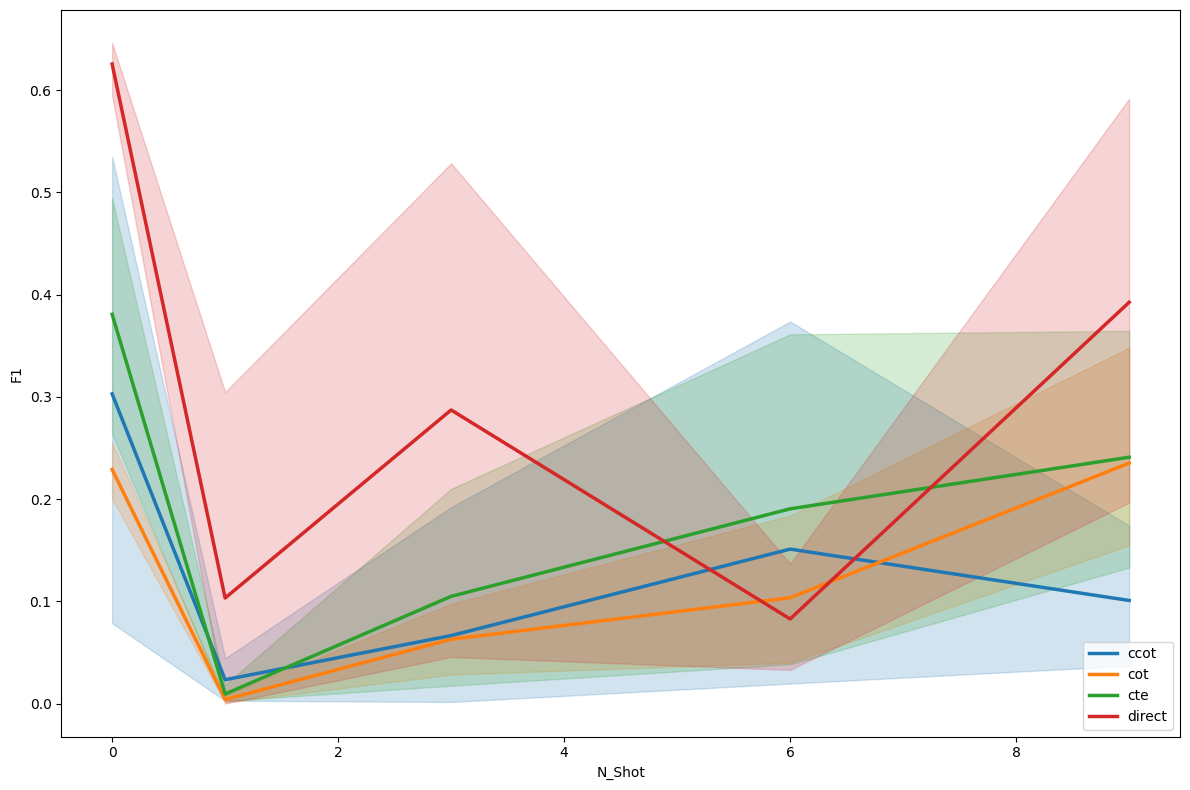

In [49]:
plot_variance(prepared_df[prepared_df['temperature'] < 1.0], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

In [50]:
df

,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,0.1,ccot/format-thought,cq,auto/ccot,0,1,0.579230,0.692420,0.625399,0.736187,...,990.0,747,61.585007,107.491650,0,37.0,47,59,1634,ccot
1,0.1,ccot/format-thought,cq,auto/ccot,0,2,0.000000,0.000000,0.000000,0.000000,...,NaN,2417,4.613984,69.160059,0,0.0,0,0,2180,ccot
2,0.1,ccot/format-thought,cq,auto/ccot,0,3,0.010757,0.013573,0.019968,0.025405,...,51.0,2383,5.311372,32.396635,0,0.0,1,3,732,ccot
3,0.5,ccot/format-thought,cq,auto/ccot,0,1,0.544890,0.653394,0.623003,0.733941,...,1050.0,841,64.994055,173.758641,0,31.0,44,57,3926,ccot
4,0.5,ccot/format-thought,cq,auto/ccot,0,2,0.168804,0.199442,0.201278,0.235322,...,132.0,1949,18.459723,83.088632,0,0.0,2,18,2208,ccot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.1,direct/format-few,cq,auto/direct,9,2,0.121225,0.155668,0.189297,0.242239,...,24.0,2046,1.156403,4.141858,0,0.0,0,0,72,direct
146,0.1,direct/format-few,cq,auto/direct,9,3,0.102193,0.142802,0.066294,0.095798,...,20.0,2115,6.117258,16.784500,0,3.0,4,5,385,direct
147,0.5,direct/format-few,cq,auto/direct,9,1,0.611088,0.733374,0.656550,0.770790,...,24.0,642,10.012461,13.644809,3,4.0,5,8,100,direct
148,0.5,direct/format-few,cq,auto/direct,9,2,0.067439,0.111374,0.089457,0.151463,...,18.0,2193,3.820793,5.545374,0,1.0,4,5,212,direct
